In [7]:
pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 887 kB/s 
     |████████████████████████████████| 9.9 MB 19.8 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 428 kB 67.0 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.6 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [5]:
df = pd.read_csv("amazon.csv", engine='python')
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


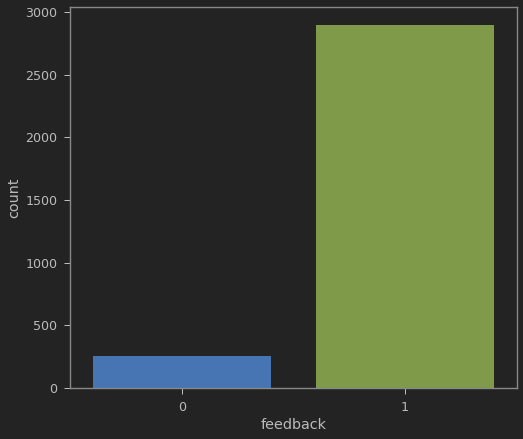

In [15]:
 sns.countplot(df['feedback'], label = "Count") 

In [17]:
df['length'] = df['verified_reviews'].apply(len)

In [18]:
df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.686984
std,0.273778,182.526555
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,166.000000
max,1.000000,2853.000000


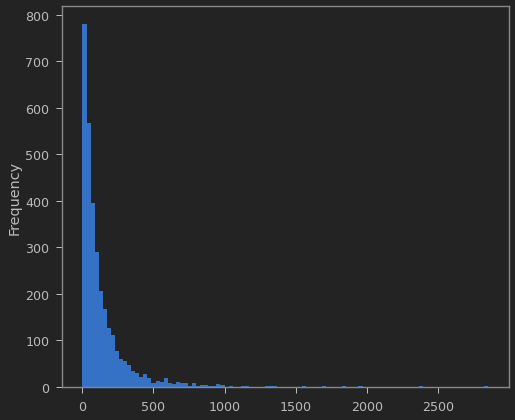

In [19]:
df['length'].plot(bins=100, kind='hist') 

In [22]:
string = df['verified_reviews'].tolist()
one_string = ' '.join(string)

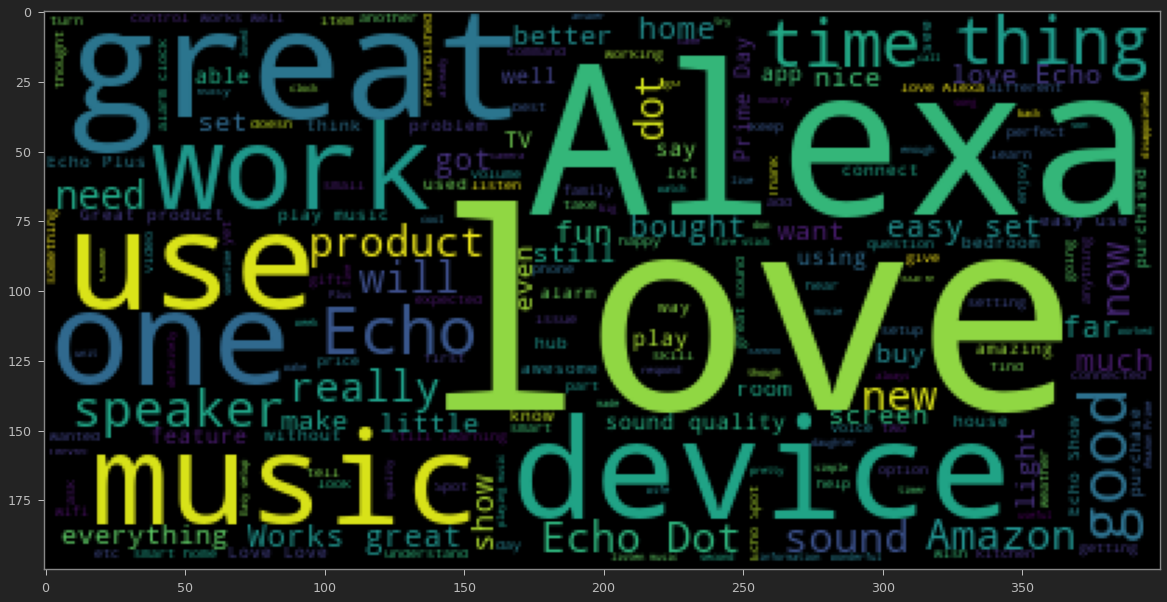

In [23]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_string))

In [25]:
import string
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
import spacy

In [28]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [42]:
def cleaning(message):
  punc_removed = [char for char in message if char not in string.punctuation]
  punc_removed_join = ''.join(punc_removed)
  punc_stopword = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  doc = nlp(' '.join(punc_stopword))
  return [token.lemma_ for token in doc]

In [46]:
message = 'She goes apples'


In [47]:
cleaning(message)

['go', 'apple']

In [51]:
# Let's test the newly added function
df_clean = df['verified_reviews'].apply(cleaning)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
countvectorizer = CountVectorizer(analyzer = cleaning, dtype = 'uint8').fit_transform(df['verified_reviews']).toarray()
# tweets_countvectorizer = vectorizer

In [53]:
X = countvectorizer

In [56]:
y = df['feedback']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [58]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix


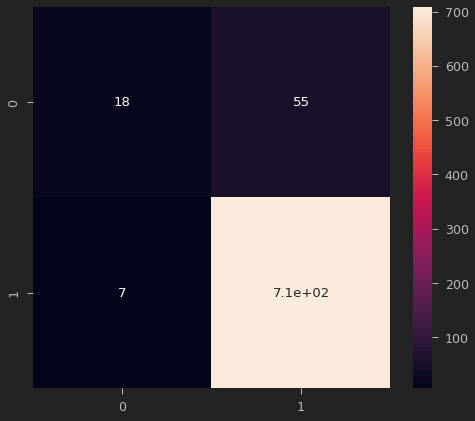

In [61]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.25      0.37        73
           1       0.93      0.99      0.96       715

    accuracy                           0.92       788
   macro avg       0.82      0.62      0.66       788
weighted avg       0.91      0.92      0.90       788



In [63]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train, y_train)

LogisticRegression()

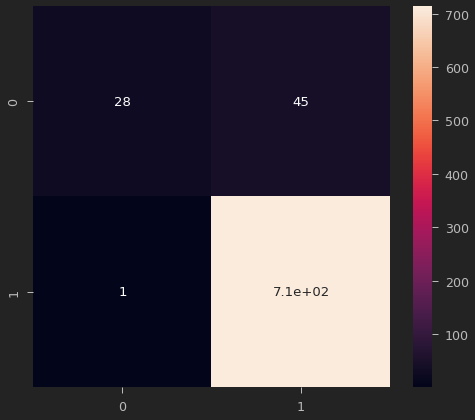

In [65]:
# Predicting the Test set results
y_predict_test = LG.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.38      0.55        73
           1       0.94      1.00      0.97       715

    accuracy                           0.94       788
   macro avg       0.95      0.69      0.76       788
weighted avg       0.94      0.94      0.93       788

